## Data visualization

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
df_houses = pd.read_csv("../sample-data/california_housing_test.csv")

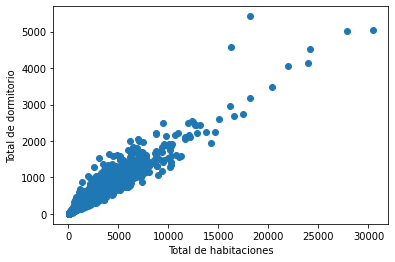

In [7]:
total_bedrooms = df_houses["total_bedrooms"]
total_rooms = df_houses["total_rooms"].astype(int)

plt.scatter(total_rooms, total_bedrooms)
plt.xlabel("Total de habitaciones")
plt.ylabel("Total de dormitorio")
plt.show()

## EDA - Exploratory Data Analysis

In [ ]:
#  TODO: MAKE A EDA (Exploratory)
# url = "https://github.com/awesomedata/awesome-public-datasets/blob/master/Datasets/titanic.csv.zip "
# df_cencus = pd.read_csv(url)
# df_cencus.info()